In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df1=pd.read_csv("sargento-salinidad-201117.csv", skiprows=3, sep=",")

In [3]:
df1.head()

,2,10/26/2017 13:00:00,54525.5,24.91,54622.1,36.1588
0,3,10/26/2017 13:15:00,54525.5,24.82,54719.0,36.2311
1,4,10/26/2017 13:30:00,54525.5,24.76,54783.8,36.2794
2,5,10/26/2017 13:45:00,54525.5,24.75,54794.6,36.2875
3,6,10/26/2017 14:00:00,54525.5,24.73,54816.2,36.3036
4,7,10/26/2017 14:15:00,54525.5,24.72,54827.0,36.3117


In [4]:
df2=pd.DataFrame(df1)

In [5]:
df2.columns=["#", "Fecha", "ConditionHighRng", "Temp_C", "Specific_Conductance", "Salinity"]


In [6]:
df2['Ndate'] = pd.to_datetime(df2['Fecha'], format='%m/%d/%Y %H:%M:%S')
df2['month'] = df2['Ndate'].dt.month
df2.head()

,#,Fecha,ConditionHighRng,Temp_C,Specific_Conductance,Salinity,Ndate,month
0,3,10/26/2017 13:15:00,54525.5,24.82,54719.0,36.2311,2017-10-26 13:15:00,10
1,4,10/26/2017 13:30:00,54525.5,24.76,54783.8,36.2794,2017-10-26 13:30:00,10
2,5,10/26/2017 13:45:00,54525.5,24.75,54794.6,36.2875,2017-10-26 13:45:00,10
3,6,10/26/2017 14:00:00,54525.5,24.73,54816.2,36.3036,2017-10-26 14:00:00,10
4,7,10/26/2017 14:15:00,54525.5,24.72,54827.0,36.3117,2017-10-26 14:15:00,10


In [7]:
df3=pd.read_csv("sargento_201117.csv", skiprows=2, sep=",")

In [8]:
df3.head()

,1,10/26/2017 13:00:00,105.612,24.448,-0.150
0,2,10/26/2017 13:15:00,105.513,24.351,-0.160
1,3,10/26/2017 13:30:00,105.433,24.351,-0.168
2,4,10/26/2017 13:45:00,105.385,24.351,-0.173
3,5,10/26/2017 14:00:00,105.321,24.351,-0.179
4,6,10/26/2017 14:15:00,105.273,24.351,-0.184


In [9]:
df3.columns=["#", "Fecha", "Abs_Pres", "Temp_C", "Nivel_mar"]

In [10]:
df3['Ndate'] = pd.to_datetime(df3['Fecha'], format='%m/%d/%Y %H:%M:%S')
df3['month'] = df3['Ndate'].dt.month
df3.head()

,#,Fecha,Abs_Pres,Temp_C,Nivel_mar,Ndate,month
0,2,10/26/2017 13:15:00,105.513,24.351,-0.160,2017-10-26 13:15:00,10
1,3,10/26/2017 13:30:00,105.433,24.351,-0.168,2017-10-26 13:30:00,10
2,4,10/26/2017 13:45:00,105.385,24.351,-0.173,2017-10-26 13:45:00,10
3,5,10/26/2017 14:00:00,105.321,24.351,-0.179,2017-10-26 14:00:00,10
4,6,10/26/2017 14:15:00,105.273,24.351,-0.184,2017-10-26 14:15:00,10


In [11]:
df6=pd.concat([df2["Ndate"],df2["month"], df2["Salinity"],df2["Temp_C"], df3["Nivel_mar"], ],join="inner", axis=1)

In [12]:
df6.head()

,Ndate,month,Salinity,Temp_C,Nivel_mar
0,2017-10-26 13:15:00,10,36.2311,24.82,-0.160
1,2017-10-26 13:30:00,10,36.2794,24.76,-0.168
2,2017-10-26 13:45:00,10,36.2875,24.75,-0.173
3,2017-10-26 14:00:00,10,36.3036,24.73,-0.179
4,2017-10-26 14:15:00,10,36.3117,24.72,-0.184


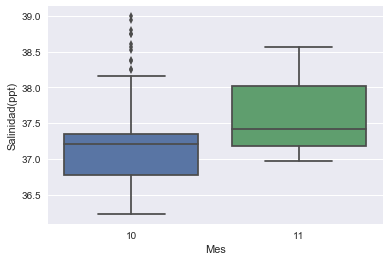

In [28]:
import seaborn as sns
ax = sns.boxplot(x="month", y="Salinity", data=df6)

plt.xlabel("Mes")
plt.ylabel("Salinidad(ppt)")
plt.show()

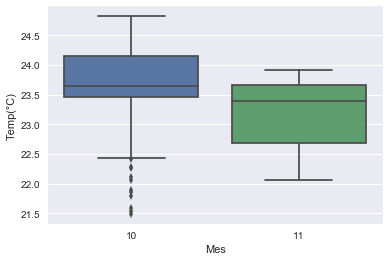

In [29]:
import seaborn as sns
ax = sns.boxplot(x="month", y="Temp_C", data=df6)
plt.xlabel("Mes")
plt.ylabel("Temp(°C)")
plt.show()

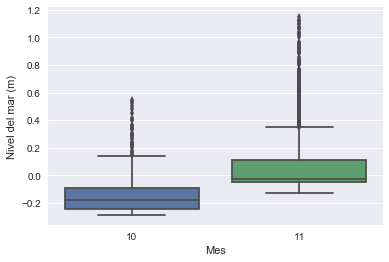

In [30]:
import seaborn as sns
ax = sns.boxplot(x="month", y="Nivel_mar", data=df6)
plt.xlabel("Mes")
plt.ylabel("Nivel del mar (m)")
plt.show()

In [16]:
df6.describe()

,month,Salinity,Temp_C,Nivel_mar
count,2393.000000,2393.000000,2393.000000,2393.000000
mean,10.781446,37.480289,23.315980,0.030939
std,0.413352,0.464286,0.546177,0.235994
min,10.000000,36.231100,21.490000,-0.288000
25%,11.000000,37.151400,22.730000,-0.071000
50%,11.000000,37.328300,23.490000,-0.035000
75%,11.000000,37.980300,23.700000,0.019000
max,11.000000,38.994200,24.820000,1.146000


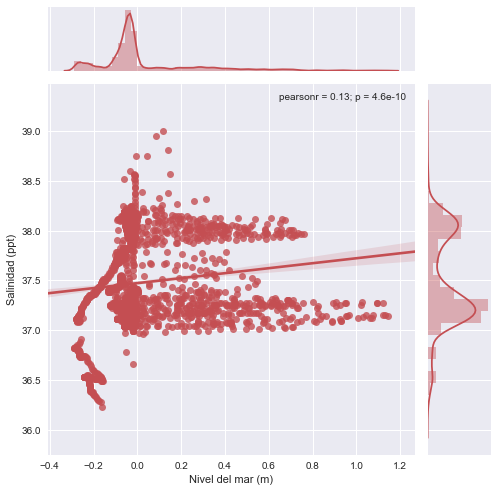

In [33]:
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot("Nivel_mar", "Salinity", data=df6, kind="reg",
                   color="r", size=7)

plt.xlabel("Nivel del mar (m)")
plt.ylabel("Salinidad (ppt)")
plt.show(g)

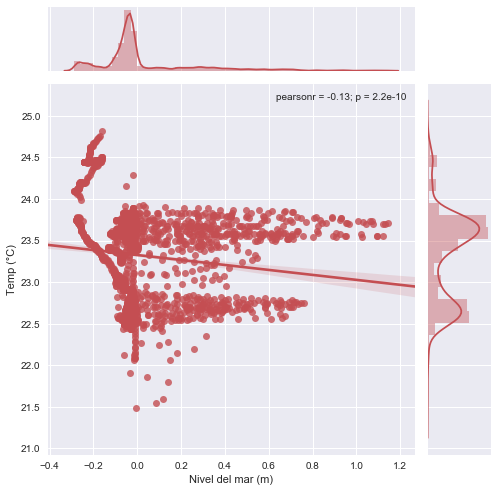

In [34]:
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot("Nivel_mar", "Temp_C", data=df6, kind="reg",
                   color="r", size=7)

plt.xlabel("Nivel del mar (m)")
plt.ylabel("Temp (°C)")
plt.show(g)

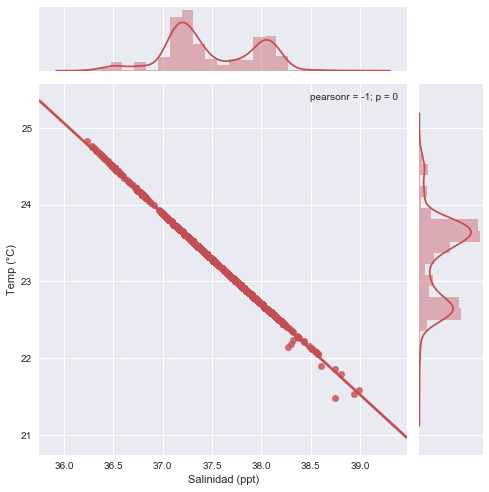

In [35]:
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot("Salinity", "Temp_C", data=df6, kind="reg",
                   color="r", size=7)

plt.xlabel("Salinidad (ppt)")
plt.ylabel("Temp (°C)")
plt.show(g)

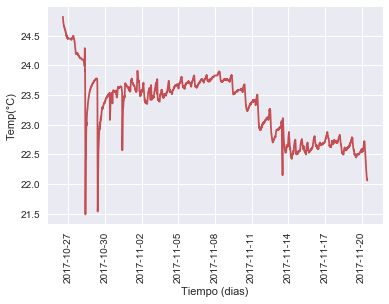

In [56]:
plt.plot_date(x=df6.Ndate, y=df6.Temp_C, fmt="r-")

plt.xticks(rotation=90)
plt.ylabel("Temp(°C)")
plt.xlabel("Tiempo (dias)")
plt.grid(True)
plt.show()

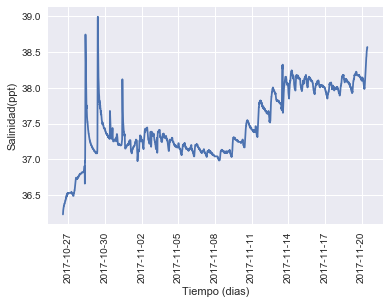

In [58]:
plt.plot_date(x=df6.Ndate, y=df6.Salinity, fmt="b-")

plt.xticks(rotation=90)
plt.ylabel("Salinidad(ppt)")
plt.xlabel("Tiempo (dias)")
plt.grid(True)
plt.show()

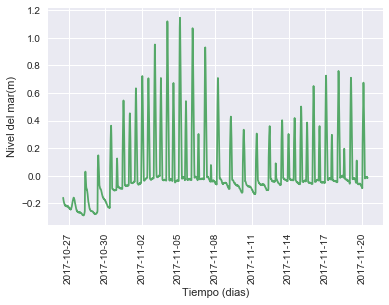

In [61]:
plt.plot_date(x=df6.Ndate, y=df6.Nivel_mar, fmt="g-")

plt.xticks(rotation=90)
plt.ylabel("Nivel del mar(m)")
plt.xlabel("Tiempo (dias)")
plt.grid(True)
plt.show()

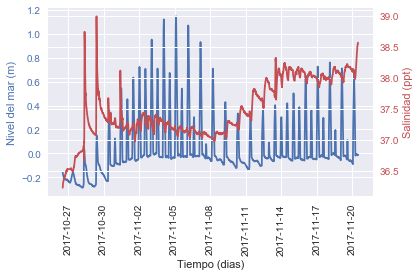

In [46]:
fig, ax1= plt.subplots()
t=df6["Ndate"]
s1=df6["Nivel_mar"]
ax1.plot(t, s1, "b-")
ax1.set_xlabel("Tiempo (dias)")
plt.xticks(rotation=90)

ax1.set_ylabel("Nivel del mar (m)", color="b")
ax1.tick_params("y", colors="b")


ax2=ax1.twinx()
s2= df6["Salinity"]
ax2.plot(t, s2, "r")
ax2.set_ylabel("Salinidad (ppt)", color="r")
ax2.tick_params("y", colors="r")

fig.tight_layout()
plt.show()

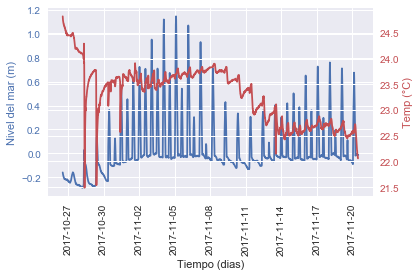

In [47]:
fig, ax1= plt.subplots()
t=df6["Ndate"]
s1=df6["Nivel_mar"]
ax1.plot(t, s1, "b-")
ax1.set_xlabel("Tiempo (dias)")
plt.xticks(rotation=90)

ax1.set_ylabel("Nivel del mar (m)", color="b")
ax1.tick_params("y", colors="b")


ax2=ax1.twinx()
s2= df6["Temp_C"]
ax2.plot(t, s2, "r")
ax2.set_ylabel("Temp (°C)", color="r")
ax2.tick_params("y", colors="r")

fig.tight_layout()
plt.show()



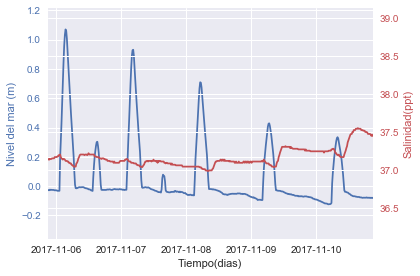

In [49]:
fig, ax1= plt.subplots()
t=df6["Ndate"]
s1=df6["Nivel_mar"]
ax1.plot(t, s1, "b-")
ax1.set_xlabel("Tiempo(dias)")

plt.xlim(['2017-11-05 21:00:00', '2017-11-10 21:00:00'])


ax1.set_ylabel("Nivel del mar (m)", color="b")
ax1.tick_params("y", colors="b")


ax2=ax1.twinx()
s2= df6["Salinity"]
ax2.plot(t, s2, "r")
ax2.set_ylabel("Salinidad(ppt)", color="r")
ax2.tick_params("y", colors="r")

fig.tight_layout()
plt.show()

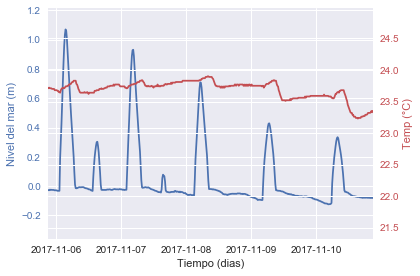

In [52]:
fig, ax1= plt.subplots()
t=df6["Ndate"]
s1=df6["Nivel_mar"]
ax1.plot(t, s1, "b-")
ax1.set_xlabel("Tiempo (dias)")
plt.xlim(['2017-11-05 21:00:00', '2017-11-10 21:00:00'])

ax1.set_ylabel("Nivel del mar (m)", color="b")
ax1.tick_params("y", colors="b")


ax2=ax1.twinx()
s2= df6["Temp_C"]
ax2.plot(t, s2, "r")
ax2.set_ylabel("Temp (°C)", color="r")
ax2.tick_params("y", colors="r")

fig.tight_layout()
plt.show()